In [151]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from ls_fringeapp import fringeprocess as fp


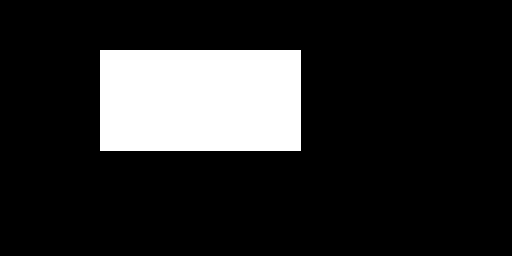

In [152]:
# start simple
img = Image.new(mode="L", size=(512, 256))
draw = ImageDraw.Draw(img)
draw.rectangle((100, 50, 300, 150), fill="white")
img

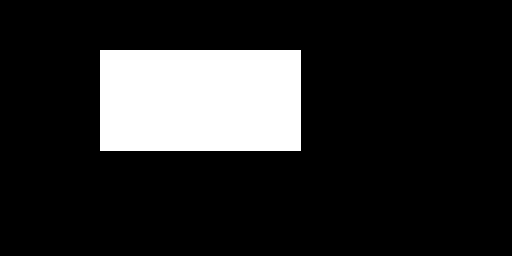

In [ ]:
# identity affine
# x′=ax+by+c
# y′=dx+ey+f


img3 = img.transform((512, 256), Image.AFFINE, (1, 0, 0, 0, 1, 0), Image.BICUBIC)
img3

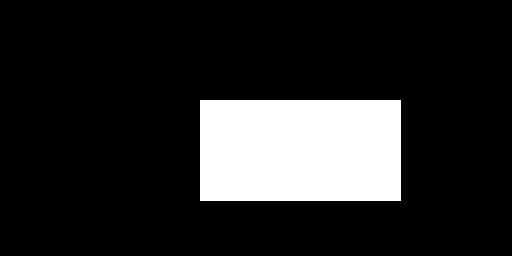

In [ ]:
# translation
img3 = img.transform((512, 256), Image.AFFINE, (1, 0, -100, 0, 1, -50), Image.BICUBIC)
img3

In [155]:
# wrap up in  function
# with some linear algebra


def affine_coeffs(pa, pb):
    pa = pa.reshape(-1, 2)
    X1 = np.hstack((pa, np.ones((pa.shape[0], 1))))
    pb = pb.reshape(-1, 2)
    X2 = np.hstack((pb, np.ones((pb.shape[0], 1))))
    X1_inv = np.linalg.pinv(X1)
    A = np.dot(X1_inv, X2)
    inv_A = np.linalg.inv(A)
    a_params = inv_A[:, :2].T.flatten()
    return a_params


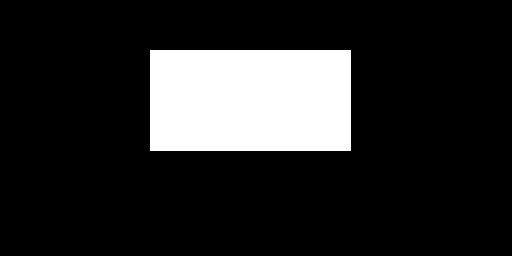

In [ ]:
# translate
pa = np.array([(100, 50), (100, 300), (200, 50), (200, 300)])
pb = np.array([(150, 50), (150, 300), (250, 50), (250, 300)])
a_params = affine_coeffs(pa, pb)
img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

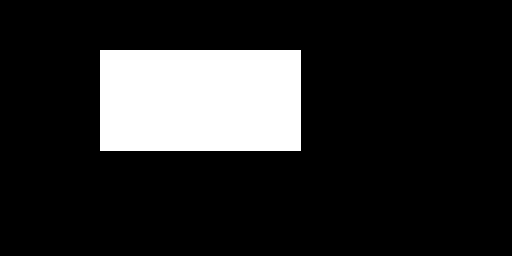

In [157]:
img

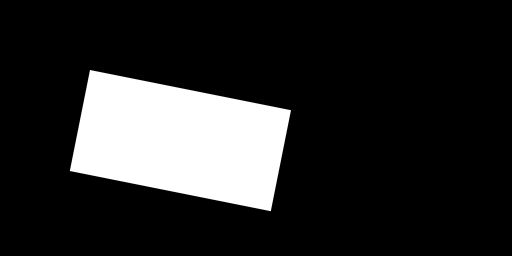

In [158]:
# rotate
pa = np.array([(100, 100), (100, 300), (200, 100), (200, 300)])
pb = np.array([[80.0, 120.0], [40.0, 320.0], [180.0, 140.0], [140.0, 340.0]])
a_params = affine_coeffs(pa, pb)

img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

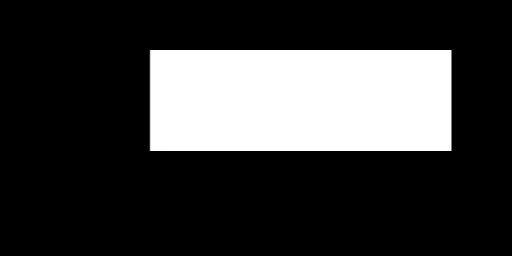

In [159]:
# scale across (x)
pa = np.array([(100, 100), (100, 300), (200, 100), (200, 300)])
pb = np.array([[150.0, 100.0], [150.0, 300.0], [300.0, 100.0], [300.0, 300.0]])
a_params = affine_coeffs(pa, pb)

img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

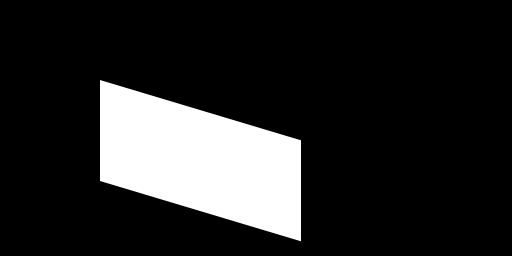

In [ ]:
# shear
pa = np.array([(100, 100), (100, 300), (200, 100), (200, 300)])
pb = np.array([[100.0, 130.0], [100.0, 330.0], [200.0, 160.0], [200.0, 360.0]])
a_params = affine_coeffs(pa, pb)

img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

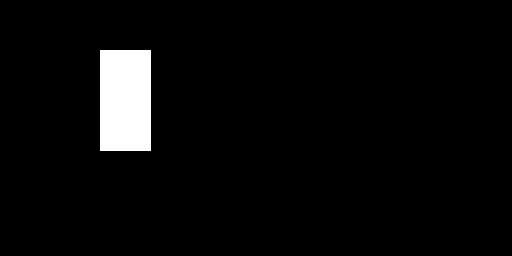

In [ ]:
# something more gauge block shaped
img = Image.new(mode="L", size=(512, 256))
draw = ImageDraw.Draw(img)
draw.rectangle((100, 50, 150, 150), fill="white")
img

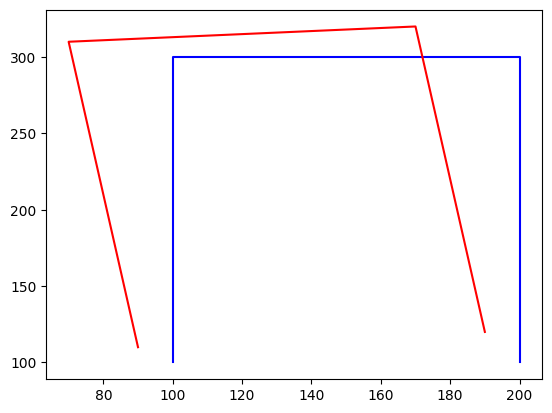

In [162]:
pa = np.array([(100, 100), (100, 300), (200, 300), (200, 100)])
pb = np.array([[90.0, 110.0], [70.0, 310.0], [170.0, 320.0], [190.0, 120.0]])
plt.plot(pa[:, 0], pa[:, 1], "b-")
plt.plot(pb[:, 0], pb[:, 1], "r-")

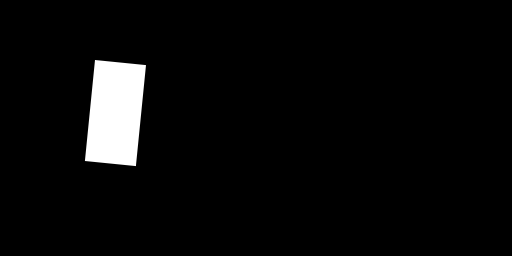

In [188]:
a_params = affine_coeffs(pa, pb)

img_gb = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img_gb

In [ ]:
length = ((pb[0, :] - pb[1, :]) ** 2).sum() ** 0.5
width = ((pb[1, :] - pb[2, :]) ** 2).sum() ** 0.5
length, width

(np.float64(200.9975124224178), np.float64(100.4987562112089))

In [190]:
dirn = (pb[2, :] - pb[1, :]) / width
sq_pts = pb[0:2, :] + length * dirn
sq_pts


array([[290., 130.],
       [270., 330.]])

In [191]:
pb2 = np.vstack((pb[0], pb[1], sq_pts[1], sq_pts[0]))
pb2

array([[ 90., 110.],
       [ 70., 310.],
       [270., 330.],
       [290., 130.]])

(np.float64(59.0), np.float64(301.0), np.float64(99.0), np.float64(341.0))

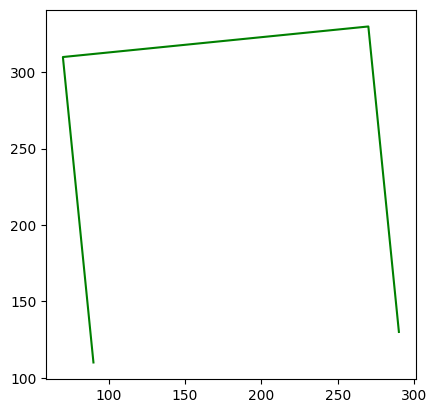

In [ ]:
plt.plot(pb2[:, 0], pb2[:, 1], "g-")

plt.axis("square")

(np.float64(59.0), np.float64(301.0), np.float64(99.0), np.float64(341.0))

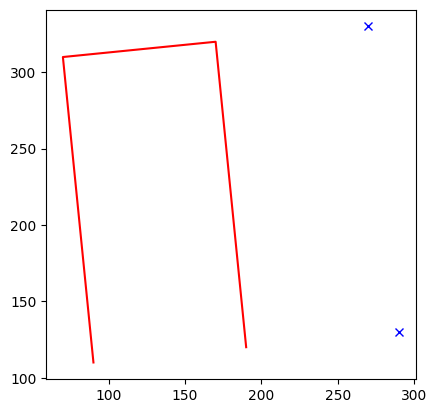

In [ ]:
plt.plot(pb[:, 0], pb[:, 1], "r-")
plt.plot(sq_pts[:, 0], sq_pts[:, 1], "bx")


plt.axis("square")

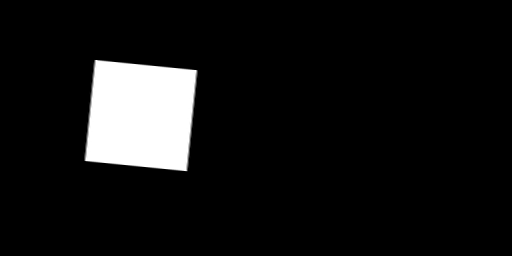

In [194]:
a_params = affine_coeffs(pb, pb2)

img3 = img_gb.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3